In [ ]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Positive_tensors.zip

--2023-09-30 17:28:31--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Positive_tensors.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2598656062 (2.4G) [application/zip]
Saving to: ‘Positive_tensors.zip’

Positive_tensors.zi 100%[===================>]   2.42G  29.0MB/s    in 77s     

2023-09-30 17:29:49 (32.0 MB/s) - ‘Positive_tensors.zip’ saved [2598656062/2598656062]



In [ ]:
!unzip -q Positive_tensors.zip

In [ ]:
! wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Negative_tensors.zip
!unzip -q Negative_tensors.zip

--2023-09-30 17:33:02--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Negative_tensors.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2111408108 (2.0G) [application/zip]
Saving to: ‘Negative_tensors.zip’

Negative_tensors.zi 100%[===================>]   1.97G  32.6MB/s    in 62s     

2023-09-30 17:34:05 (32.5 MB/s) - ‘Negative_tensors.zip’ saved [2111408108/2111408108]



In [ ]:
!pip install torchvision

In [ ]:
%pip install pandas
%pip install matplotlib
%pip install torchsummary
%pip install torchviz
%pip install graphviz
%pip install h5py

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4130 sha256=c081538bd2f2420d575a4244b4fd13fffe4595389eed9a977a8c47df6ac2524e
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
import torchvision.models as models
from PIL import Image
import pandas
from torchvision import transforms
import torch.nn as nn
import time
import torch
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
import h5py
import os
import glob
torch.manual_seed(0)

In [ ]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os

In [ ]:
class Dataset(Dataset):

    # Constructor
    def __init__(self,transform=None,train=True):
        #directory="/home/wsuser/work"
        #directory="/home/xamanek/PythonProjects/IBM_AI_Engineer"
        directory="/content"
        positive="Positive_tensors"
        negative='Negative_tensors'

        positive_file_path=os.path.join(directory,positive)
        negative_file_path=os.path.join(directory,negative)
        positive_files=[os.path.join(positive_file_path,file) for file in os.listdir(positive_file_path) if file.endswith(".pt")]
        negative_files=[os.path.join(negative_file_path,file) for file in os.listdir(negative_file_path) if file.endswith(".pt")]
        number_of_samples=len(positive_files)+len(negative_files)
        self.all_files=[None]*number_of_samples
        self.all_files[::2]=positive_files
        self.all_files[1::2]=negative_files
        # The transform is goint to be used on image
        self.transform = transform
        #torch.LongTensor
        self.Y=torch.zeros([number_of_samples]).type(torch.LongTensor)
        self.Y[::2]=1
        self.Y[1::2]=0

        if train:
            self.all_files=self.all_files[0:30000]
            self.Y=self.Y[0:30000]
            self.len=len(self.all_files)
        else:
            self.all_files=self.all_files[30000:]
            self.Y=self.Y[30000:]
            self.len=len(self.all_files)

    # Get the length
    def __len__(self):
        return self.len

    # Getter
    def __getitem__(self, idx):

        image=torch.load(self.all_files[idx])
        y=self.Y[idx]

        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

print("done")
#/content/Negative_tensors

done


In [ ]:
train_dataset = Dataset(train=True)
validation_dataset = Dataset(train=False)
print("done")

done


In [ ]:
model = models.resnet18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 64.3MB/s]


In [ ]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
import torch.nn as nn

# Replace the output layer with a new one for binary classification
model.fc = nn.Linear(in_features=512, out_features=2)

In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
train_dataset2 = Dataset(transform = None, train = True)
val_dataset2 = Dataset(transform = None, train = False)

train_loader = DataLoader(train_dataset2, batch_size = 100, shuffle = True)
val_loader = DataLoader(val_dataset2, batch_size = 100, shuffle = False)

In [ ]:
optimizer = torch.optim.Adam([parameters  for parameters in model.parameters() if parameters.requires_grad],lr=0.001)

In [ ]:
n_epochs=1
loss_list=[]
accuracy_list=[]
correct=0
N_test=len(val_dataset2)
N_train=len(train_dataset2)
start_time = time.time()
#n_epochs

Loss=0
start_time = time.time()
for epoch in range(n_epochs):
    print("Numero de epoch: ", n_epochs)
    n_cantidad = 1
    for x, y in train_loader:
        print("train_loader: ", n_cantidad)
        #model.train()
        model.train()

        #clear gradient
        optimizer.zero_grad()

        #make a prediction
        z = model(x)

        # calculate loss
        Loss = criterion(z, y)

        # calculate gradients of parameters
        Loss.backward()

        # update parameters
        optimizer.step()

        loss_list.append(Loss.data)
        n_cantidad += 1

    correct=0
    #resnet18.eval()
    n_cantidad = 1
    for x_test, y_test in val_loader:
        # set model to eval
        print("val_loader: ", n_cantidad)
        model.eval()

        #make a prediction
        z_test = model(x_test)

        #find max
        _, yhat = torch.max(z_test.data, 1)


        #Calculate misclassified  samples in mini-batch
        #hint +=(yhat==y_test).sum().item()
        correct += (yhat == y_test).sum().item()
        n_cantidad += 1


    accuracy=correct/N_test
    accuracy_list.append(accuracy)

print("Entrenamiento en (minutos) = ", (time.time() - start_time) / 60 )

Numero de epoch:  1
train_loader:  1
train_loader:  2
train_loader:  3
train_loader:  4
train_loader:  5
train_loader:  6
train_loader:  7
train_loader:  8
train_loader:  9
train_loader:  10
train_loader:  11
train_loader:  12
train_loader:  13
train_loader:  14
train_loader:  15
train_loader:  16
train_loader:  17
train_loader:  18
train_loader:  19
train_loader:  20
train_loader:  21
train_loader:  22
train_loader:  23
train_loader:  24
train_loader:  25
train_loader:  26
train_loader:  27
train_loader:  28
train_loader:  29
train_loader:  30
train_loader:  31
train_loader:  32
train_loader:  33
train_loader:  34
train_loader:  35
train_loader:  36
train_loader:  37
train_loader:  38
train_loader:  39
train_loader:  40
train_loader:  41
train_loader:  42
train_loader:  43
train_loader:  44
train_loader:  45
train_loader:  46
train_loader:  47
train_loader:  48
train_loader:  49
train_loader:  50
train_loader:  51
train_loader:  52
train_loader:  53
train_loader:  54
train_loader:  55

In [ ]:
accuracy

0.9901

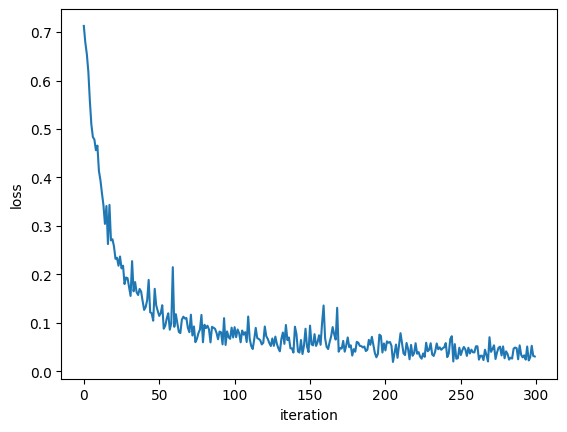

In [ ]:
plt.plot(loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

In [25]:
model.eval()

misclassified_samples = []
misclassified_indices = []
misclassified_labels = []
misclassified_preds = []

for i, (x_test, y_test) in enumerate(val_loader):
    # making a prediction
    z_test = model(x_test)

    # finding max
    _, yhat = torch.max(z_test.data, 1)

    # checking for misclassified samples
    for j in range( len(y_test) ):
        if yhat[j] != y_test[j]:
            misclassified_samples.append( x_test[j] )
            misclassified_indices.append( i*len( y_test ) + j )
            misclassified_labels.append( y_test[j] )
            misclassified_preds.append( yhat[j] )
            if len(misclassified_samples ) == 4:
                break;

    if len( misclassified_samples ) == 4:
        break;

print( "Indices of first 4 misclassified samples: ", misclassified_indices )
print( "True labels of misclassified samples: ", misclassified_labels )
print( "Predicted labels of misclassified samples: ", misclassified_preds )

Indices of first 4 misclassified samples:  [156, 183, 216, 244]
True labels of misclassified samples:  [tensor(1), tensor(0), tensor(1), tensor(1)]
Predicted labels of misclassified samples:  [tensor(0), tensor(1), tensor(0), tensor(0)]
